In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [4]:
def load_data_from_json(filename):
    tmp = {}
    
    with open(filename) as file:
        tmp = json.load(file)
        
    index = pd.date_range(start=tmp["t0"], freq=tmp["freq"], periods=tmp["length"])
    tmp["data"] = pd.Series(data=tmp["data"], index=index)
        
    return tmp

In [5]:
time_series_data = load_data_from_json("tmp/all.json")
time_series_data

{'freq': 'H',
 't0': '2020-01-01 00:00:00',
 'length': 500,
 'data': 2020-01-01 00:00:00      23.988535
 2020-01-01 01:00:00     -30.676209
 2020-01-01 02:00:00      90.003015
 2020-01-01 03:00:00     -57.712445
 2020-01-01 04:00:00     -22.221766
                           ...     
 2020-01-21 15:00:00    1745.258014
 2020-01-21 16:00:00    1729.837137
 2020-01-21 17:00:00    1868.686526
 2020-01-21 18:00:00    1850.154887
 2020-01-21 19:00:00    1953.937528
 Freq: H, Length: 500, dtype: float64}

In [6]:
def train_test_split(data, ratio=0.9):
    train_length = int(len(data) * ratio)
    prediction_length = int(len(data)) - train_length
    training_dataset = data[:-prediction_length]
    target_dataset = data[train_length-1:]
    test_dataset = data
    
    return {
        "prediction_length": prediction_length,
        "training_dataset": training_dataset,
        "target_dataset": target_dataset,
        "test_dataset": test_dataset
    }

In [7]:
results = train_test_split(time_series_data["data"])

print(results["prediction_length"])

50


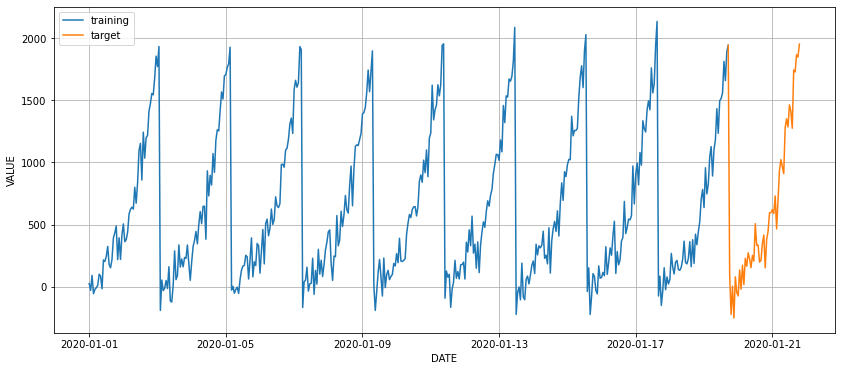

In [9]:
training_dataset = results["training_dataset"]
target_dataset = results["target_dataset"]

plt.figure(figsize=(14,6))
plt.plot(training_dataset.index, training_dataset, label="training")
plt.plot(target_dataset.index, target_dataset, label="target")
plt.grid(True)
plt.xlabel("DATE")
plt.ylabel("VALUE")    
plt.legend()
plt.show()

In [12]:
def series_to_object(data):
    return {"start": str(data.index[0]), "target": list(data)}


def series_to_jsonline(data):
    return json.dumps(series_to_object(data))

def save_data_to_jsonlines(data, filename):
    tmp = {}
    
    with open(filename, 'wb') as file:
        file.write(series_to_jsonline(data).encode("utf-8"))
        file.write("\n".encode("utf-8"))

In [13]:
save_data_to_jsonlines(results["training_dataset"], "tmp/training.jsonl")
save_data_to_jsonlines(results["test_dataset"], "tmp/test.jsonl")

In [14]:
s3_bucket = 'sagemaker-cookbook-bucket'
prefix = 'chapter11'

In [15]:
!aws s3 cp tmp/training.jsonl s3://{s3_bucket}/{prefix}/input/training.jsonl
!aws s3 cp tmp/test.jsonl s3://{s3_bucket}/{prefix}/input/test.jsonl

upload: tmp/training.jsonl to s3://sagemaker-cookbook-bucket/chapter11/input/training.jsonl
upload: tmp/test.jsonl to s3://sagemaker-cookbook-bucket/chapter11/input/test.jsonl


In [16]:
prediction_length = results["prediction_length"]

%store prediction_length

Stored 'prediction_length' (int)


In [18]:
freq = time_series_data["freq"]

%store freq

Stored 'freq' (str)


In [21]:
training_dataset = results["training_dataset"]
%store training_dataset
training_dataset

Stored 'training_dataset' (Series)


2020-01-01 00:00:00      23.988535
2020-01-01 01:00:00     -30.676209
2020-01-01 02:00:00      90.003015
2020-01-01 03:00:00     -57.712445
2020-01-01 04:00:00     -22.221766
                          ...     
2020-01-19 13:00:00    1560.265493
2020-01-19 14:00:00    1814.918124
2020-01-19 15:00:00    1659.630602
2020-01-19 16:00:00    1894.520627
2020-01-19 17:00:00    1944.680454
Freq: H, Length: 450, dtype: float64

In [22]:
target_dataset = results["target_dataset"]
%store target_dataset
target_dataset

Stored 'target_dataset' (Series)


2020-01-19 17:00:00    1944.680454
2020-01-19 18:00:00     102.593104
2020-01-19 19:00:00    -224.525666
2020-01-19 20:00:00       2.125743
2020-01-19 21:00:00    -253.289114
2020-01-19 22:00:00      78.326029
2020-01-19 23:00:00     -47.724199
2020-01-20 00:00:00     -75.239860
2020-01-20 01:00:00     134.046180
2020-01-20 02:00:00     -20.991278
2020-01-20 03:00:00     171.820317
2020-01-20 04:00:00      15.779624
2020-01-20 05:00:00     227.819568
2020-01-20 06:00:00     163.627100
2020-01-20 07:00:00     271.899731
2020-01-20 08:00:00     224.078065
2020-01-20 09:00:00     152.396095
2020-01-20 10:00:00     251.521640
2020-01-20 11:00:00     205.001667
2020-01-20 12:00:00     506.492917
2020-01-20 13:00:00     332.333435
2020-01-20 14:00:00     334.472777
2020-01-20 15:00:00     196.961034
2020-01-20 16:00:00     210.529843
2020-01-20 17:00:00     346.652564
2020-01-20 18:00:00     415.530627
2020-01-20 19:00:00     151.049888
2020-01-20 20:00:00     379.347112
2020-01-20 21:00:00 